<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Привет! Меня зовут - Сысоева Вера.
    
Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные - всё сделано правильно; жёлтые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта.

# Описание проекта.

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Задачи к 1 блоку:

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

## Задачи ко 2 блоку: 

1) Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

2) Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

3) Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

4) Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

5) Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

6) Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

7) Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

8) Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

9) Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

10) Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

11) Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

12) Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

13) Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

14) Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

# Загрузка необходимых библиотек.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Загружены необходимые библиотеки для анализа данных, проведения исследований, построения гипотез и графиков. 

Так как, согласно заданию, проект идёт в двух блоках, то обработку данных буду вести в каждом отдельном блоке, чтобы было удобнее проверять и искать ошибки, а не возвращаться постоянно в начало проекта.

# Гипотезы.

## Обработка данных.

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

display(hypothesis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

В таблице содержатся данные двух типов - object и int64.

Таблица содержит информацию о:

- Hypothesis — краткое описание гипотезы;

- Reach — охват пользователей по 10-балльной шкале;

- Impact — влияние на пользователей по 10-балльной шкале;

- Confidence — уверенность в гипотезе по 10-балльной шкале;

- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Приведу названия столбцов к нижнему регистру для удобства работы.

In [3]:
hypothesis.set_axis(['hypothesis',
               'reach',
               'impact',
               'confidence',
               'efforts',
               ], 
               axis = 'columns', 
               inplace = True)

Напишу код для того, чтобы видеть строки целиком.

In [4]:
pd.options.display.max_colwidth = 150

In [5]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


## ICE.

In [6]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis_ICE = hypothesis[['hypothesis', 'ICE']].sort_values(by  = 'ICE', ascending = False)

hypothesis_ICE

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


### Вывод по ICE:

По данной методологии, самые популярные гипотезы 8, 0 и 7. 

Исходя из текста гипотез, можно сделать вывод, что указанные гипотезы окажут серьёзное влияние как на бизнес, так и на его прибыльность.

## RICE.

Добавим также критерий Reach, чтобы уточнить гипотезы.

In [7]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis_RICE = hypothesis[['hypothesis', 'RICE']].sort_values(by  = 'RICE', ascending = False)

hypothesis_RICE

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Вывод по RICE: 

Картина изменилась - гипотеза 7 заняла главенствующую позицию с более чем вдвое превышающим RICE. Гипотеза 0 также осталась в топе. Гипотеза 8 выпала из числа лидеров.

Также новый лидер - гипотеза 2. Вырвалась вперёд именно за счёт Reach, так как данное изменение затронет очень много пользователей, если не всех.

## Общий вывод по первому блоку:

Наиболее эффективные гипотезы по RICE с индексом: 7, 2, 0, 6.


Гипотеза 8 ушла из топа, так как параметр reach у нее равен 1, гипотезы 7 и 2, наоборот, поднялись из-за высокого показателя reach 10 и 8 соответственно.

<div style="border:solid gold 2px; padding: 20px"> <h1 style="color:gold; margin-bottom:20px">Комментарий наставника</h1>

Хорошо, но стоило во-первых, округлить ice, во-вторых, сделать сравнительную таблицу с обоими параметрами.

# A/B TEST.

## Обработка данных.

In [8]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

В таблицах содержатся данные двух типов - object и int64.

В датасете orders:

- transactionId — идентификатор заказа;

- visitorId — идентификатор пользователя, совершившего заказ;

- date — дата, когда был совершён заказ;

- revenue — выручка заказа;

- group — группа A/B-теста, в которую попал заказ.

В датасете visitors:

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

Сразу приведем даты к нужному формату.

In [9]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [11]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Данные приведены к нужным для анализа форматам. Приступим к выполнению задания.

## 1.Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [13]:
datesGroups = orders[['date','group']].drop_duplicates()
 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                     orders['group'] == x['group'])]\
                                     .agg({'date' : 'max', 
                                           'group' : 'max', 
                                           'transactionId' : pd.Series.nunique, 
                                           'visitorId' : pd.Series.nunique, 
                                           'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                         visitors['group'] == x['group'])]\
                                       .agg({'date' : 'max', 
                                             'group' : 'max', 
                                             'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cummulativeData['average_check'] = cummulativeData['revenue'] / cummulativeData['orders']

cummulativeData.head()

,date,group,orders,buyers,revenue,visitors,average_check
0,2019-08-01,A,24,20,148579,719,6190.791667
1,2019-08-01,B,21,20,101217,713,4819.857143
2,2019-08-02,A,44,38,242401,1338,5509.113636
3,2019-08-02,B,45,43,266748,1294,5927.733333
4,2019-08-03,A,68,62,354874,1845,5218.735294


Посчитаем Revenue для групп A и B и построим график.

Text(0, 0.5, 'REVENUE')

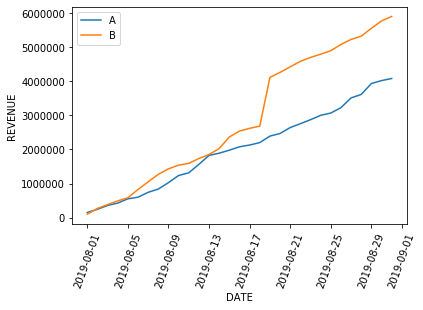

In [14]:
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue']]
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue']]

plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=70)
plt.legend()
plt.xlabel('DATE')
plt.ylabel('REVENUE')

#### По данным графикам видно что выборки параллельно растут, выборка В имела один большой всплеск около 19.08.2019

In [15]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Text(0, 0.5, 'REVENUE')

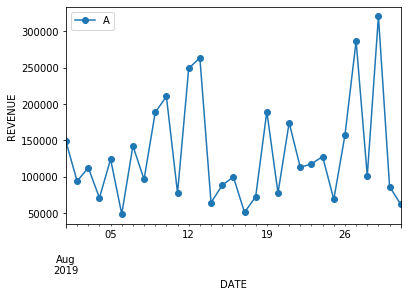

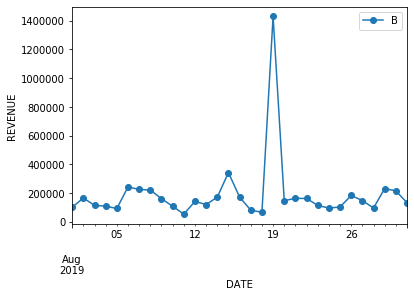

In [16]:
revenue_visitor_a = orders.query('group == "A"').groupby('date', as_index = False).agg({'revenue' : 'sum'})
revenue_visitor_b = orders.query('group == "B"').groupby('date', as_index = False).agg({'revenue' : 'sum'})

revenue_visitor_a.plot(x='date', 
         y='revenue', 
         style = 'o-',
         label='A'
         )
plt.xlabel('DATE')
plt.ylabel('REVENUE')
revenue_visitor_b.plot(x='date', 
         y='revenue',
         style = 'o-', 
         label='B')
plt.xlabel('DATE')
plt.ylabel('REVENUE')

Причина всплеска - один очень дорогой заказ, посмотрим дальнейшие метрики без него.

Text(0, 0.5, 'REVENUE')

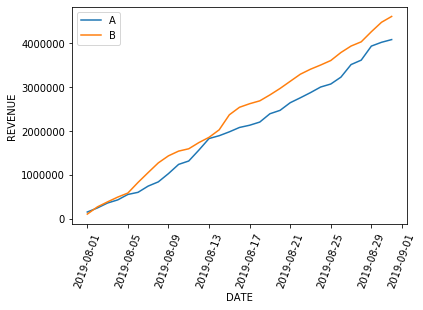

In [17]:
orders = orders.query('revenue < 1000000')

datesGroups = orders[['date','group']].drop_duplicates()
 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                     orders['group'] == x['group'])]\
                                     .agg({'date' : 'max', 
                                           'group' : 'max', 
                                           'transactionId' : pd.Series.nunique, 
                                           'visitorId' : pd.Series.nunique, 
                                           'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                         visitors['group'] == x['group'])]\
                                       .agg({'date' : 'max', 
                                             'group' : 'max', 
                                             'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cummulativeData['average_check'] = cummulativeData['revenue'] / cummulativeData['orders']

cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue']]
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue']]

plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=70)
plt.legend()
plt.xlabel('DATE')
plt.ylabel('REVENUE')

#### Даже с учётом того, что мы у группы В отобрали очень большой заказ, она все равно немного лидирует.

## 2.Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

Находим средний чек для обеих групп и строим график.

Text(0, 0.5, 'AVERAGE CHECK')

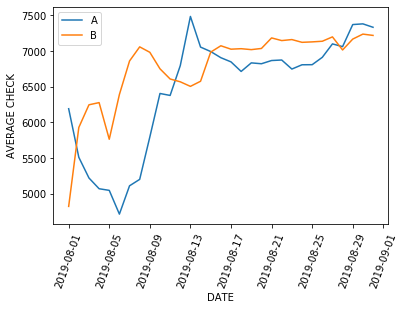

In [18]:
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','average_check']]
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','average_check']]

plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['average_check'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['average_check'], label='B')
plt.xticks(rotation=70)
plt.legend()
plt.xlabel('DATE')
plt.ylabel('AVERAGE CHECK')

#### По данным графикам видно, что в обеих группах бывают всплески.

## 3.Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

Прежде всего, необходимо соединить две таблицы.

Text(0, 0.5, 'AVERAGE CHECK DIFF')

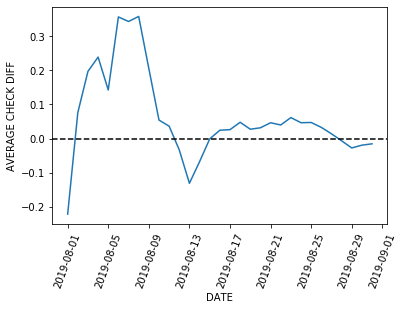

In [19]:
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]

mergedCummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB, 
                                                     left_on='date', 
                                                     right_on='date', 
                                                     how='left', 
                                                     suffixes=['A', 'B'])

plt.plot(mergedCummulativeRevenue['date'], 
         (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/
         (mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1)
plt.xticks(rotation=70)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('DATE')
plt.ylabel('AVERAGE CHECK DIFF')

#### Результаты теста имеют частые изменения, но ближе к концу периода - график стремится к 0.

## 4.Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

Считаем конверсию для обеих групп.

Text(0, 0.5, 'CONVERSION')

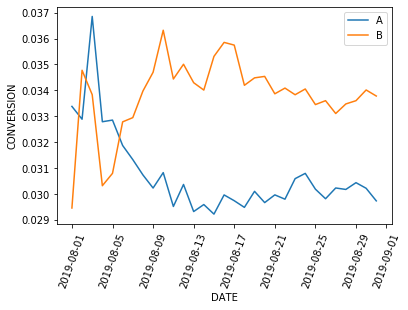

In [20]:
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']

cummulativeDataA = cummulativeData[cummulativeData['group']=='A']

cummulativeDataB = cummulativeData[cummulativeData['group']=='B']

plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
plt.xticks(rotation=70)
plt.legend()
plt.xlabel('DATE')
plt.ylabel('CONVERSION')

#### Результаты показывают, что посетители группы В делали больше заказов, чем группы А, теперь ясно почему средний чек в А выше.

## 5.Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

Text(0, 0.5, 'AV. CONVERSION GRR')

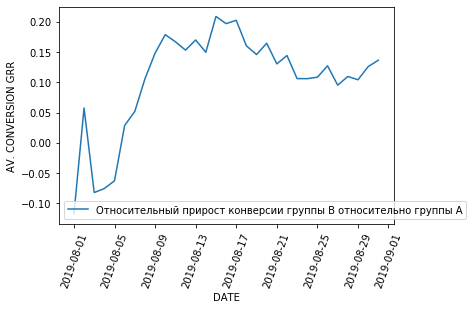

In [21]:
mergedCummulativeConversions = cummulativeDataA[['date','conversion']].merge(cummulativeDataB[['date','conversion']], 
                                                                             left_on='date', 
                                                                             right_on='date', 
                                                                             how='left', 
                                                                             suffixes=['A', 'B'])

plt.plot(mergedCummulativeConversions['date'], 
         mergedCummulativeConversions['conversionB']/mergedCummulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.xticks(rotation=70)
plt.legend()
plt.xlabel('DATE')
plt.ylabel('AV. CONVERSION GRR')

<div style="border:solid gold 2px; padding: 20px"> <h1 style="color:gold; margin-bottom:20px">Комментарий наставника</h1>

Здесь нужно было тоже линии уровня сделать.

#### В растёт больше, чем А, но очень незначительно.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Хорошо, графики построены верно.

## 6.Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

Сначала сгруппируем orders по параметру visitorId.

Text(0, 0.5, '# of Orders')

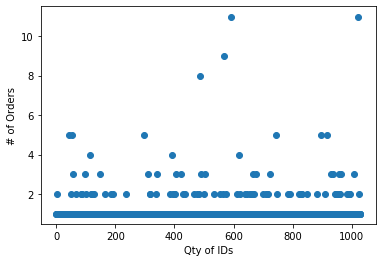

In [22]:
orders_visitor_id = orders.groupby('visitorId').agg({'transactionId' : 'nunique'})

x_values = pd.Series(range(0,len(orders_visitor_id['transactionId'])))
plt.scatter(x_values, orders_visitor_id['transactionId'])

plt.xlabel('Qty of IDs')
plt.ylabel('# of Orders')

#### Из графика видно, что больше 5 заказов мало кто делал. Основная концентрация приходится на 2 и 1 заказ. Также есть небольшое кол-во заказов 3 и 4.

## 7.Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [23]:
np.percentile(orders_visitor_id['transactionId'], [95, 99])

array([2., 4.])

#### Данные  расположены очень кучно. Выберем 99-й перцентиль.

## 8.Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

Группируем данные.

Text(0, 0.5, 'Revenue')

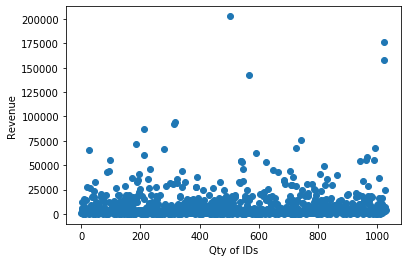

In [24]:
revenue_visitor_id = orders.groupby('visitorId').agg({'revenue' : 'sum'})

x_values = pd.Series(range(0,len(revenue_visitor_id['revenue'])))
plt.scatter(x_values, revenue_visitor_id['revenue'])
plt.xlabel('Qty of IDs')
plt.ylabel('Revenue')

#### Из графика видно, что мало кто тратил более 10 000. Основная масса приходится на заказы до 5 000.

## 9.Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [25]:
np.percentile(revenue_visitor_id['revenue'], [95, 99])

array([32618.95, 66946.4 ])

#### Вывод такой же как и в задании 7. Берём 99-й перцентиль.

<div style="border:solid gold 2px; padding: 20px"> <h1 style="color:gold; margin-bottom:20px">Комментарий наставника</h1>

Хорошо, но все же не стоило отбрасывать заранее большие заказы. Стоило сырые данные оставить сырыми и на них смот реть. А то сейчас не понятно, зачем мы еще раз отбрасываем какой-то процент.

## 10.Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

Сначала произведём расчёты необходимых показателей - посетители в день по группам, ежедневные заказы и создадим необходимые выборки.

In [26]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]\
                                            .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]\
                                            .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

Объединим таблицы.

In [27]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

Продолжим работу с датафреймом заказов

In [28]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

Создаём выборки.

In [29]:
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, 
                               index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
                               name='orders')],
                    axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, 
                               index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
                               name='orders')],
                    axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.009
0.136


#### Критерий alpha примем за 0.01, исходя из критерия Манн-Уитни.

#### По «сырым» данным различия есть в конверсии групп A и B, p-value = 0.009, это меньше 0.01.

#### Относительный проигрыш группы А 13%.

## 11.Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

In [30]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.382
-0.016


#### P-value значительно больше 0.01 - это значит, что в среднем чеке нет различий. При этом относительный прирост группы А составляет всего 1%.

## 12.Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

Для начала, найдём пользователей с аномальными заказами - будь то в денежном выражении или в количестве.

In [31]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 20000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId']
                                                           .isin(abnormalUsers))]['orders'],
                             pd.Series(0, 
                                       index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                                       name='orders')],
                            axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId']
                                                           .isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                                       name='orders')],
                            axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.011
0.149


#### По «очищенным» данным различий в конверсии групп A и B  нет , p-value = 0.011, это больше 0.01.

#### Относительный проигрыш группы А 15%.

## 13.Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [32]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.433
-0.002


#### P-value по «очищенным» данным так же значительно больше 0.05. Значит, в среднем чеке нет различий. При этом относительный прирост групп отсутствует.


<div style="border:solid gold 2px; padding: 20px"> <h1 style="color:gold; margin-bottom:20px">Комментарий наставника</h1>

Гипотезы проверены правильно, только стоило пояснить почему мы используем именно критерий Манна-Уитни.

## 14.Примите решение по результатам теста и объясните его. 

### Остановить тест, зафиксировать отсутствие различий между группами. 

# ОБЩИЙ ВЫВОД

## Блок 1:

По ICE и RICE наиболее эффективны гипотезы 7, 0 и 6. Гипотеза 7 по ICE находится в топе, но за счёт добавления показателя Reach выходит в безоговорочные лидеры по RICE.

## Блок 2:


В ходе A/B теста группа В показала себя лучше, чем группа А - у неё больше заказов. Соответственно, и выручка по ней выше.

Но, за счёт меньшего количества заказов, у группы А выше средний чек.

В целом, средний чек не очень стабилен.

В среднем, количество заказов не превышало 5, а стоимость заказа - не превышала 10 000.

По сырым данным, различия в конверсии между группами существуют. Проигрыш группы А равен 13%.

По очищенным данным, различий уже нет, но проигрыш группы А увеличился до 15%.

По обоим блокам данных, различий в среднем чеке нет, но по сырым данным относительный прирост группы А составлял 1%, а по очищенным - прироста не было вовсе.

## Финальный вывод:

После всех проведенных тестов и исследований, я бы советовал остановить тест, так как нет различий между группами по конверсии и группа А сильно отстаёт от В, а также зафиксировать явные различия в среднем чеке. 